<a href="https://colab.research.google.com/github/Oleg42-prog/Lanit-ANN/blob/master/1.%D0%9F%D0%B5%D1%80%D1%86%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD_%D0%9B%D0%A8_2020_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Перцептрон
![alt text](https://ldapwiki.com/attach/Perceptron/perceptron.jpg)

На рисунке представлена класическая схема перцептрона.

Как мы узнали из предыдущих статей - модель искусственной нейронной сети была создана по аналогии с мозгом. 
Единица вычисления в нейронно сети - нейрон (узел). Узел получает входные данные (от внешнего источника или от других узлов), а затем вычисляет выходные данные. 
Каждый вход дополняется «весом» (w). Значение весов зависит от важности каждого входа. Нейрон применяет функцию f к входным данным. Функция представляет собой сумму произведений веса на соответствующее значение входа + смещение b. Смещение - это вход равный 1, веса смещение также настраиваются во время обучения.

Компоненты перцептрона: 
- входные значения (1, x1, x2, ... 
, xn);
- веса входных значений (w0, w1, w2, ..., wn);
- значение нейрона - взвешенная сумма входных значений (1×w0 + x1×w1 + x2×w2 + ... + xn×wn);
- функция активации, которая определяет выход нейрона.


В классическом перцептроне в качестве функции активации используется пороговая. Вычисленное значение нейрона сравнивается с заданным порогом в функции активации. Если значение больше порога, то выход = 1, иначе - выход = 0.

На этапе обучения перцептрона предсказанные значения сравниваются с действительными - таким образом вычисляется ошибка обучения.
Значение ошибки далее используется для настройки весов. 


Скорость обучения (learning rate) - это значение отвечает за то, насколько сильно будут сдвигаться веса. 

Наша задачи при обучении нейронной сети - подобрать такие значения весов, при которых ошибка (погрешность между предсказанным и действительным) была минимальна. При использовании слишком большой скорости обучения (learning rate) велика вероятность, что необходимое значение может быть пропущено. При использовании слишком низкого значения - время, затрачиваемое на обучение, будет очень долгим.

Небольшая статья о перцептронах: https://neurohive.io/ru/osnovy-data-science/perseptron-rozenblatta-mashina-kotoraja-smogla-obuchatsja/

Немного про скорость обучения: https://radioprog.ru/post/773






-------------

#Пример 1

##Теперь рассмотрим построение перцептрона на практике. Задача состоит в обучении нейросети выполнять логическую операцию ИЛИ (||).

Для начала подключим библиотеку для работы с массивами и зададим значения для входных данных.

In [ ]:
import numpy as np  # подключаем библиотеку
from numpy import array, dot, random

# X - массив входных значений со всеми возможными вариациями входов для 2ух входных значений
X = array([[0,0],
            [1,0],
            [0,1],
            [1,1]])

# Y - массив эталонных значений, то есть значения по индексу соответствуют правильному ответу для дизъюнкции 2ух входных значений из массива Х
Y = array([0,1,1,1])

Добавим в массив входных значений смещение (bias).

In [ ]:
# проверим размерность массива
x_shape = X.shape
x_shape

(4, 2)

In [ ]:
# создадим массив со значениями смещений
arr_bias = np.ones((x_shape[0],1), dtype=int)
arr_bias

array([[1],
       [1],
       [1],
       [1]])

In [ ]:
# добавим к массиву входных значений массив смещений
X = np.append(X, arr_bias, axis=1)
X

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 1]])

In [ ]:
# W - рандомные начальные значения весов для входных значений
W = random.rand(3)
W

array([0.01086812, 0.57914304, 0.1841605 ])

Начнем реализацию алгоритма для построения и обучения перцептрона

In [ ]:
# функция активации
activate = lambda sum: 0 if sum < 0 else 1

# скорость обучения
lr = 2e-1 
# количество итераций обучения
N = 200

for i in range(N):
    # рандомное число от 0 до 3 для определения индекса примера из массива Х
    rndm = random.randint(4)
    # присвоение значения переменной по сгенерированному индексу
    element_x = X[rndm]
    expected = Y[rndm]
    # произведение входного значения (Х) на вес (W)
    result = dot(W, element_x)
    # вычисление ошибки 
    error = expected - activate(result)
    # изменение весов
    for i in range(len(W)):
        W[i] += lr * error * element_x[i]
print(W)

[ 0.21086812  0.57914304 -0.0158395 ]


Тестирование

In [ ]:
# вывод результата тренировки
for element_x in X:
    result = dot(element_x, W)
    print("{}: {} -> {}".format(element_x[:2], result, activate(result)))


[0 0]: -0.015839496953599264 -> 0
[1 0]: 0.1950286240502611 -> 1
[0 1]: 0.5633035441194865 -> 1
[1 1]: 0.7741716651233468 -> 1


#Самостоятельное задание 1.
##Написать аналогичный алгоритм для решения операции логического И (&).

In [146]:
activate = lambda sum: 0 if sum < 0 else 1

X = array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y = array([0, 0, 0, 1])
X = np.append(X, np.ones((4, 1), dtype=int), axis=1)
W = random.rand(3)

lr = 2e-1 
N = 200
for i in range(N):
    rndm = random.randint(4)
    element_x = X[rndm]
    expected = Y[rndm]
    result = dot(W, element_x)
    error = expected - activate(result)
    W += lr * error * element_x
print("W =", W)
for element_x in X:
    result = dot(element_x, W)
    print("{}: {} -> {}".format(element_x[:2], result, activate(result)))

W = [ 0.19564992  0.24970971 -0.42772956]
[0 0]: -0.4277295629388758 -> 0
[1 0]: -0.23207964342392884 -> 0
[0 1]: -0.17801985582535762 -> 0
[1 1]: 0.01763006368958936 -> 1


#Самостоятельное задание 2.
##Написать алгоритм для обучения перцептрона возводить в квадрат.
*то есть на вход будет подаваться число S и на выходе должно получиться Sˆ2.

In [149]:
import matplotlib.pyplot as plt
%matplotlib inline

def learning(X, Y, W, N, lr):
  for i in range(N):
    rndm = random.randint(X.shape[0])
    element_x = X[rndm]
    expected = Y[rndm]
    result = dot(W, element_x)
    error = expected - result
    for i in range(len(W)):
      W[i] += lr * error * element_x[i]
  return W


n = 10
X = np.arange(n).reshape(n, 1)
X = np.append(X, np.ones((n, 1), dtype=int), axis=1)
Y = np.array([i*i for i in range(10)])
W = random.rand(X.shape[1])

for i in range(1, 10):
  W = learning(X, Y, W, 1000, 2e-2 / i) # Уменьшаем каждый раз скорость обучения, чтобы повысить точность
W
# Реальная линейная регрессия для этих данных имеет вид: 9x - 12

array([  8.82940761, -12.48606051])

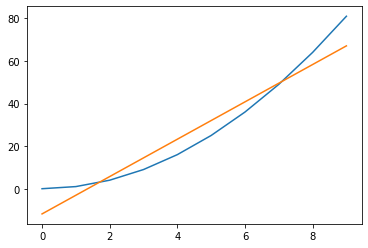

In [148]:
results = np.array(list(map(lambda x: dot(x, W), X)))
plt.plot(X[:,0], Y, label="line L")
plt.plot(X[:,0], results, label="line H")
plt.show()